# 1D Pilot-wave equations: Regular dynamics

# Case: $a, b, \omega_2 = (1, 0, 1)$ 

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from scipy.integrate import solve_ivp
from pylds.base import compute_lagrangian_descriptor
from pylds.tools import draw_ld, draw_all_lds, normalise, get_gradient_magnitude, draw_ld_pair

This expressions matches the one in the Overleaf project of the students

# Regular dynamics

* WAVE EQUATION: Differences in notation

_Students notation_

\begin{equation}
    \Psi = c_{0,0}\psi_{0,0} + a\:c_{1,0}\psi_{1,0} + b\:c_{1,1}\psi_{1,1}
\end{equation}

Setting $\omega_1=1$ and $\omega_2=\frac{1}{c^2}$ for some $c \in \mathbb{R}$, and setting $c_{0,0}= 1, c_{1,0}= \frac{1}{\sqrt{2}}, c_{1,1}= \frac{1}{2}$.

_Notation followed_

\begin{equation}
    \Psi = \psi_{0,0} + C_{1}\psi_{1,0} + C_{2}\psi_{1,1}
\end{equation}

where $C_1 = \frac{a}{\sqrt{2}}$ and $C_2 = \frac{b}{2}$

* ASSAYS
   * __First__, test the effect on the dynamics revealed by LDs, as we add up excited states to the ground state
   * __Second__, test the effect on the dynamics revealed by LDs, as the dynamics changes from regular to chaotic when the ratio of angular frequencies, $\omega_1 / \omega_2$, changes from rational to irrational. 
   * __Third__, LD convergence with integration time $\tau$

## Description

* Wave function

\begin{equation*}
    \Psi = \psi_{0,0} + \frac{1}{\sqrt{2}}\psi_{1,0}
\end{equation*}

* Bohm equations of motion

\begin{aligned}
    \frac{dx}{dt} &= -\frac{\sin(t)}{1+2x\cos(t)+x^2}\\
    \frac{dy}{dt} &= \; 0
\end{aligned}

* Nodal lines (where $\Psi(x_N, y_N, t_N) = 0$)

\begin{equation*}
(x_N, y_N, t_N) = ((-1)^{k+1}, y, k \pi) \quad y \in \mathbb{R}; k \in \mathbb{Z}
\end{equation*}

## Vector field and trajectories

In [2]:
def f(t, x, a = 1, omega1 = 1):
    f1 = -a*np.sqrt(omega1)*np.sin(omega1*t)
    f2 = 1 + 2*a*np.sqrt(omega1)*x*np.cos(omega1*t) + a**2 * omega1 * x**2
    return f1/f2

In [161]:
a = 1
#omega1 = 10
omega1 = 1
vector_field = lambda t, x: f(t, x, a, omega1)

t0, tf = [0, 4*np.pi]
time_span = (t0, tf)
color_traj = 'magenta'

TRAJECTORIES = []
TRAJECTORIES_LDs = []
TRAJECTORIES_arclenght = []
N_traj = 402

ICs_interval = [-3, 3]
for x0 in np.linspace(*ICs_interval, N_traj):
    solution = solve_ivp(vector_field, time_span, [x0], rtol=1.0e-12)
    trajectory = solution.y
    TRAJECTORIES.append([solution.t, trajectory[0]])
    
    arclength = np.sum(np.linalg.norm(np.gradient(np.array([solution.t, trajectory[0]]).T,axis=0),axis=1))
    TRAJECTORIES_arclenght.append(arclength)
    
    # compute LD
    v = f(solution.t, trajectory[0])
    TRAJECTORIES_LDs.append( np.sum(np.abs(v)**2) )

In [162]:
lds = np.array(TRAJECTORIES_arclenght)
lds = (lds - lds.min())/(lds.max() - lds.min())

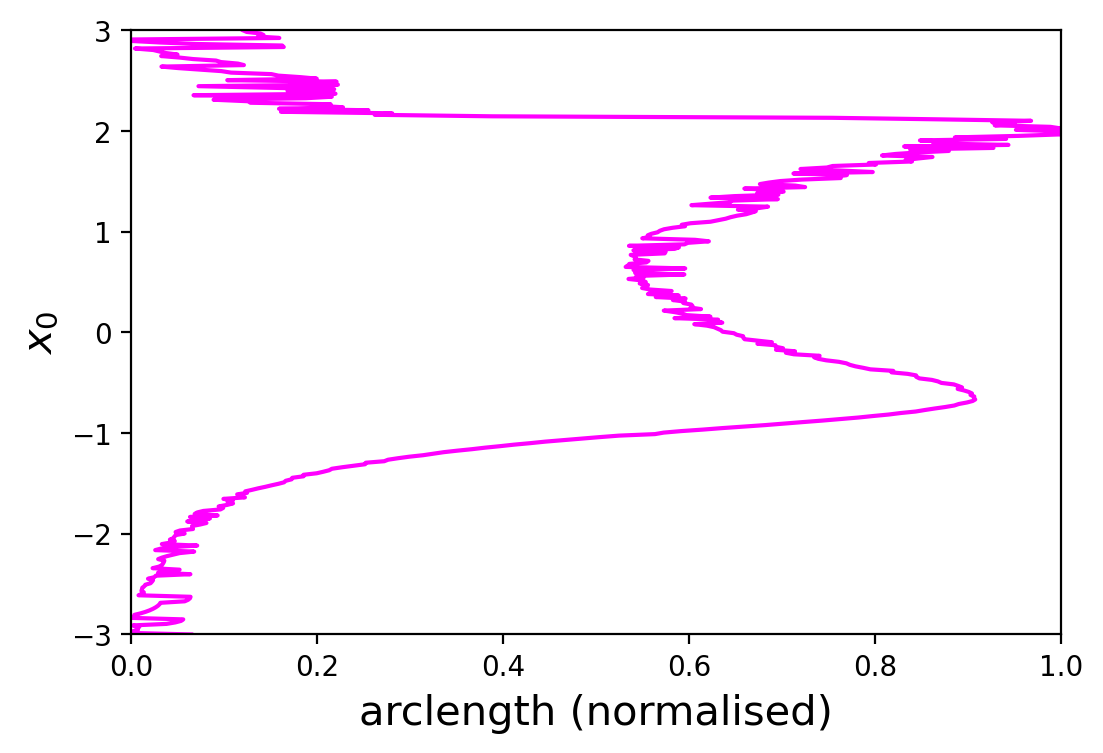

In [163]:
figure = plt.figure(dpi=200)
x0_axis = np.linspace(*ICs_interval, 402)

plt.plot(lds, x0_axis, color="magenta")

plt.xlabel("arclength (normalised)",fontsize=15)
plt.ylabel("$x_0$",fontsize=15)


plt.plot((-1,-1),(0,1),lw=1,linestyle="--", color="black")
plt.plot((1,1),(0,1),lw=1,linestyle="--", color="black")

plt.xlim(0,1)
plt.ylim(-3,3)

plt.show()

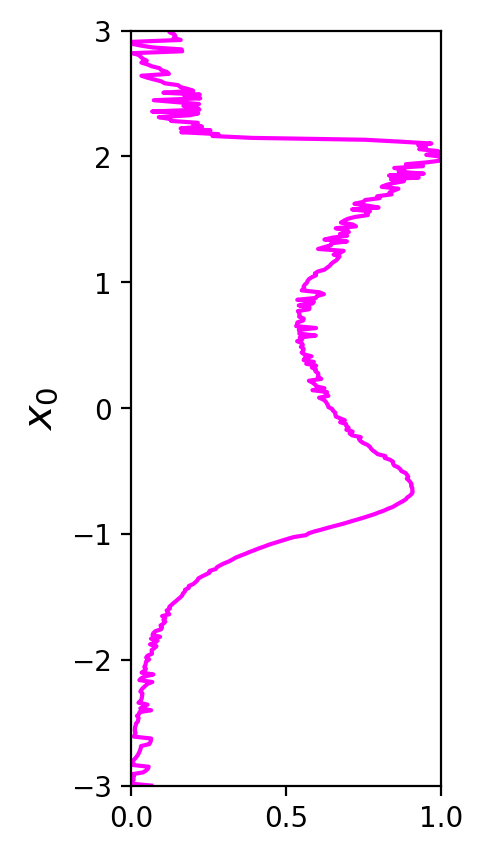

In [164]:
figure = plt.figure(figsize=(2,5),dpi=200)
x0_axis = np.linspace(*ICs_interval, 402)

plt.plot(lds, x0_axis, color="magenta")

# plt.xlabel("arclength (normalised)",fontsize=15)
plt.ylabel("$x_0$",fontsize=15)


plt.plot((-1,-1),(0,1),lw=1,linestyle="--", color="black")
plt.plot((1,1),(0,1),lw=1,linestyle="--", color="black")

plt.xlim(0,1)
plt.ylim(-3,3)

plt.show()

In [165]:
import matplotlib as mpl

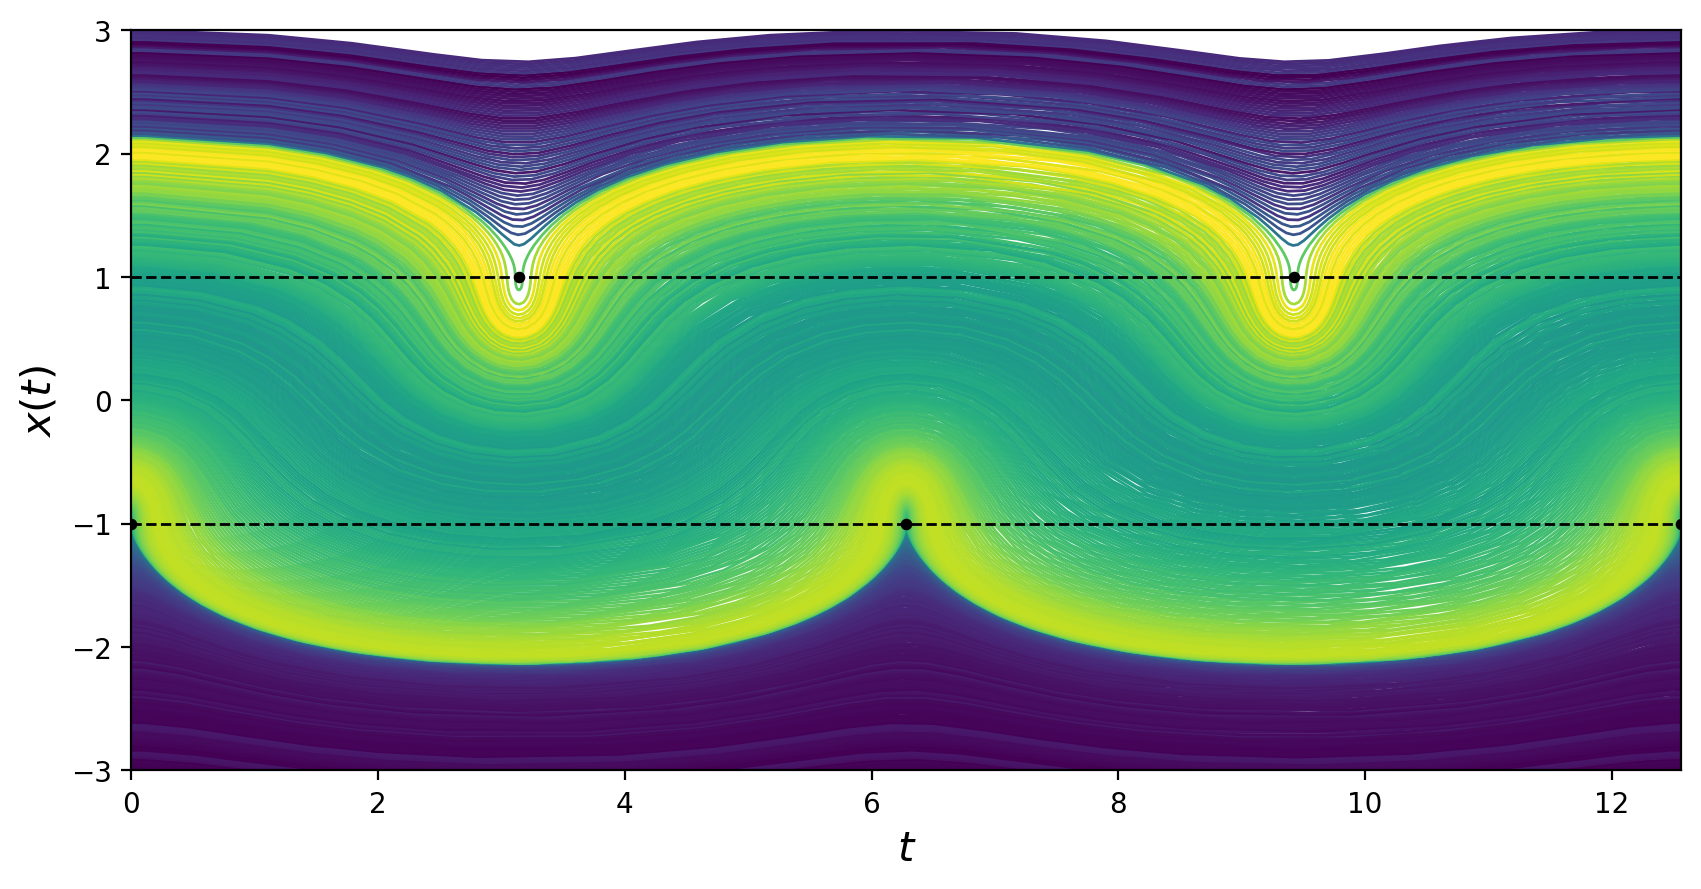

In [166]:
fig,ax = plt.subplots(1,1,figsize=(10,5),dpi=200)

cmap = plt.cm.viridis

for i in range(N_traj):
    time, position = TRAJECTORIES[i]
    myplot = ax.plot(time, position, c=cmap(lds[i]), lw=1, alpha=1)

#axis labels
ax.set_xlabel("$t$", fontsize=15)
ax.set_ylabel("$x(t)$", fontsize=15)

for k in range(5):
    ax.scatter(k*np.pi, a*(-1)**(k+1), color="black", s=10, zorder=10, alpha=1)

ax.plot((0, 4*np.pi), (a,a), lw=1,linestyle="--", color="black")
ax.plot((0, 4*np.pi), (-a*1,-a*1), lw=1,linestyle="--", color="black")

# cb = mpl.colorbar.ColorbarBase(ax,cmap)
# plt.colorbar(ax)
    
# # ax.set_xlim(0, 4*np.pi)
# # ax.set_ylim(-3, 3)
# # title = "CONFIGURATION SPACE:
# # $\Psi = \psi_{0,0} + a/ \sqrt{2} \psi_{1,0}$; ($a, b, \omega_2$) = ($"+str(a)+", 0, 1$)"
# ax.set_title(title, fontsize=15)

ax.set_ylim(-3,3)
ax.set_xlim(0, 4*np.pi)
ax.set_aspect(1)
plt.show()

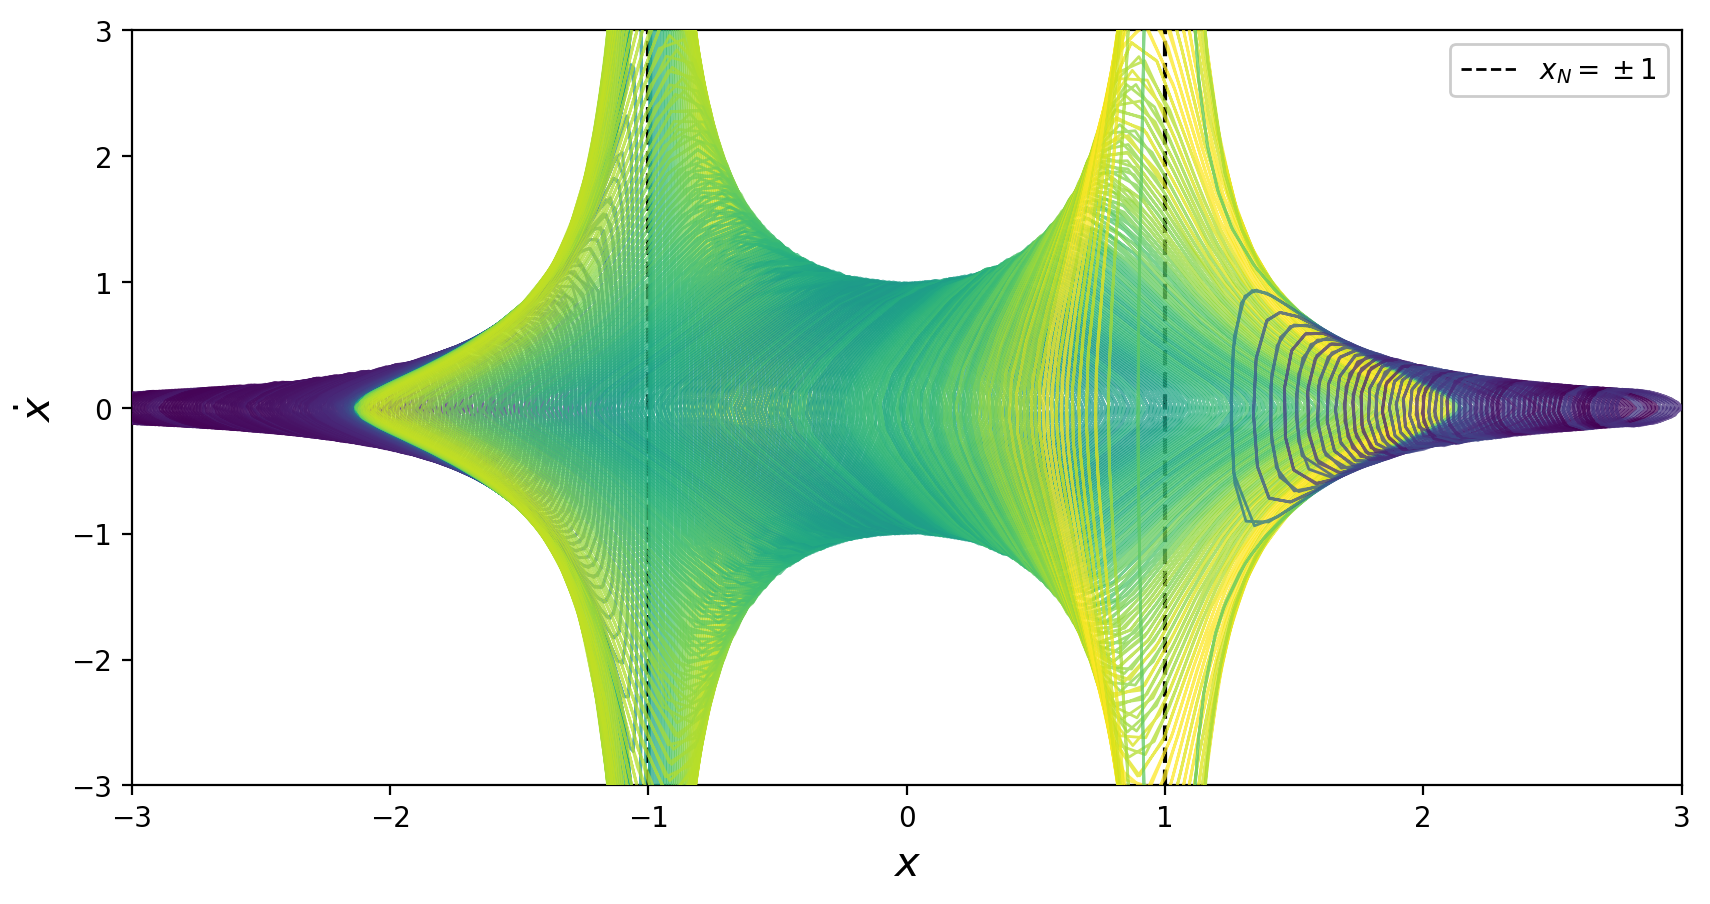

In [174]:
fig, ax = plt.subplots(1,1,figsize=(10,5),dpi=200)

cmap = plt.cm.viridis

for i in range(402):
    time, positions = TRAJECTORIES[i]
    momentum = f(time, positions)
    myplot = ax.plot(positions, momentum, c=cmap(lds[i]), lw=1, alpha=0.75, zorder=i)

ax.plot((-1,-1), (-3, 3), lw=1.5,linestyle="--", color="black", zorder=10)
ax.plot(( 1, 1), (-3, 3), lw=1.5,linestyle="--", color="black", zorder=10)

label = "$x_N = \pm 1$"
ax.plot([], [], color="black", linestyle="--", lw=1, label=label)

ax.legend(loc="upper right", facecolor="white", framealpha=1)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$\dot{x}$", fontsize=15)

# ax.set_aspect(1)
plt.show()

In [221]:
%matplotlib notebook

<IPython.core.display.Javascript object>


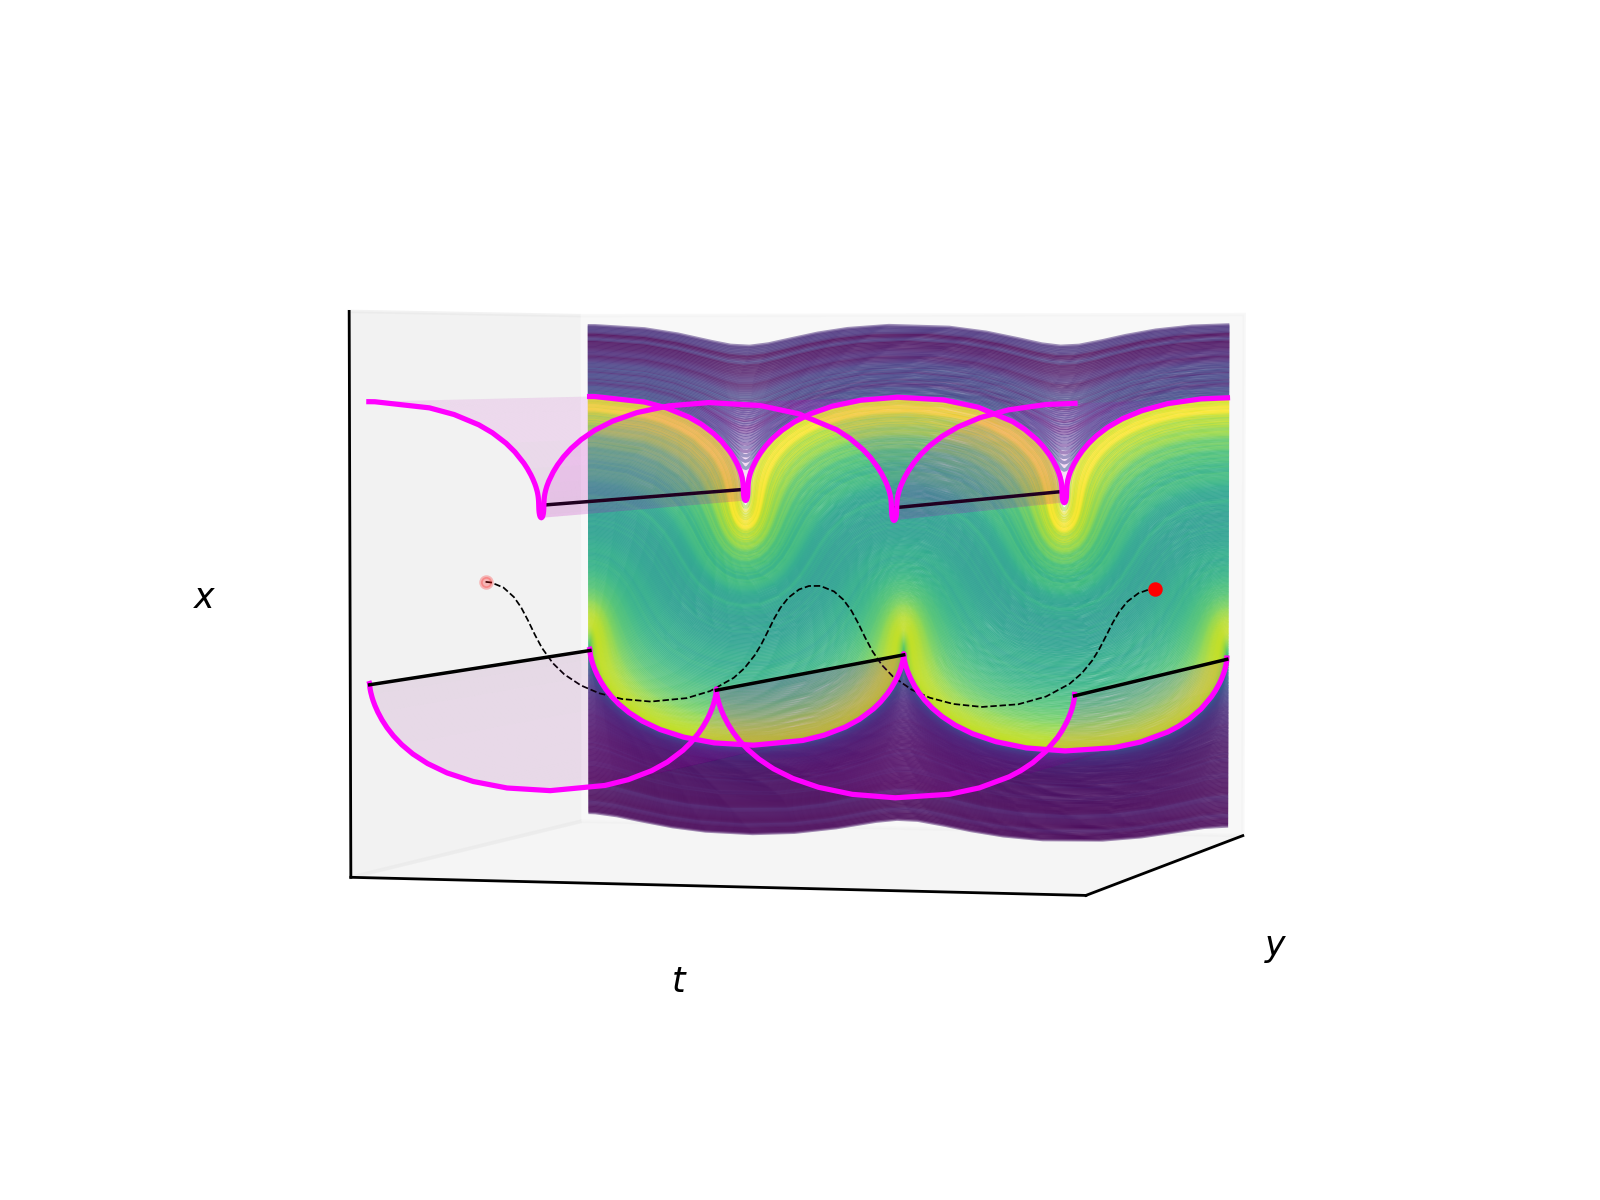

In [288]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=200)

#######################################
# Plot the surface.
y_axis = np.linspace(-3, 3, 100)
x0 = 2.13
solution = solve_ivp(vector_field, time_span, [x0], rtol=1.0e-12)
trajectory = solution.y
X, Y = np.meshgrid(y_axis, solution.t)
xx, yy = np.meshgrid(np.ones(len(Y[0])), trajectory[0])

surf_plus = ax.plot_surface(X, Y, yy,color="magenta",alpha=0.1) # positive curve
ax.plot(3*np.ones(len(solution.t)), solution.t, trajectory[0], color="magenta", zorder=10)
ax.plot(-3*np.ones(len(solution.t)), solution.t, trajectory[0], color="magenta", zorder=10)
#######################################
# Plot the surface.
y_axis = np.linspace(-3, 3, 100)
x0 = -0.9855072463768115
solution = solve_ivp(vector_field, time_span, [x0], rtol=1.0e-12)
trajectory = solution.y
X, Y = np.meshgrid(y_axis, solution.t)
xx, yy = np.meshgrid(np.ones(len(Y[0])), trajectory[0])

surf_plus = ax.plot_surface(X, Y, yy,color="magenta",alpha=0.1) # positive curve
# border curves
ax.plot(3*np.ones(len(solution.t)), solution.t, trajectory[0], color="magenta", zorder=10)
ax.plot(-3*np.ones(len(solution.t)), solution.t, trajectory[0], color="magenta", zorder=10)
#######################################

# plot nodal lines
N_nodal = 100
xN = np.linspace(-3, 3, N_nodal)
ax.plot(xN,(np.pi)*np.ones(N_nodal), 1*np.ones(N_nodal), color="black", lw=1, alpha=1)
ax.plot(xN,(3*np.pi)*np.ones(N_nodal), 1*np.ones(N_nodal), color="black", lw=1, alpha=1)

ax.plot(xN,(0*np.pi)*np.ones(N_nodal), -1*np.ones(N_nodal), color="black", lw=1, alpha=1, zorder=20)
ax.plot(xN,(2*np.pi)*np.ones(N_nodal), -1*np.ones(N_nodal), color="black", lw=1, alpha=1, zorder=20)
ax.plot(xN,(4*np.pi)*np.ones(N_nodal), -1*np.ones(N_nodal), color="black", lw=1, alpha=1, zorder=20)

#######################################
for i in range(N_traj):
    time, position = TRAJECTORIES[i]
    ax.plot(-3*np.ones(len(time)), time, position, c=cmap(lds[i]), lw=1, alpha=0.5,zorder=-40)

#######################################
# SINGLE TRAJECTORY
i=200
time, position = TRAJECTORIES[i]
ax.plot(0*np.ones(len(time)), time, position, c="black", lw=0.5, linestyle="--", alpha=1)

ax.scatter(0, time[0], position[0], c="red", s=10, alpha=0.25)
# ax.scatter(0, time[25], position[25], c="red", s=10, alpha=0.25)
ax.scatter(0, time[-1], position[-1], c="red", s=10)

#######################################
ax.set_xlim(-3, 3)
ax.set_ylim( 0, 4*np.pi)
ax.set_zlim(-3, 3)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel("$y$")
ax.set_ylabel("$t$")
ax.set_zlabel("$x$")

# for axis in ['top','bottom','left','right']:
#     ax.spines[axis].set_linewidth(0.1)

ax.grid(False)
# ax.set_axis_off()

fig.tight_layout()
plt.show()